<a href="https://colab.research.google.com/github/Antique-1/machine-learning-practice/blob/main/250514_pca_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석

## PCA 클래스

### 데이터 불러오기

In [ ]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2025-05-14 00:26:47--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2025-05-14 00:26:47--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2025-05-14 00:26:48--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:4

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) # -1 은 300장 그대로 불러오겠다는 뜻

In [ ]:
fruits.shape

(300, 100, 100)

In [ ]:
fruits_2d.shape # 10000 일차원 사이즈의 객체 300개

(300, 10000)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
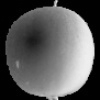

In [ ]:
fruits_2d[0].reshape(100,100)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)

(50, 10000)


In [ ]:
pca.components_[0].reshape(100,100)

array([[-9.24490195e-06, -5.10601298e-06, -8.91640398e-06, ...,
        -3.64260921e-06, -9.34252918e-07, -4.67126459e-06],
       [-1.15833514e-05, -5.76383497e-07, -4.14828737e-06, ...,
        -0.00000000e+00, -9.02785432e-07, -0.00000000e+00],
       [-5.83134163e-06, -2.29451889e-06, -1.61700364e-06, ...,
        -0.00000000e+00, -4.60832962e-06, -0.00000000e+00],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [ ]:
import matplotlib.pyplot as plt

# 각 클러스터별 샘플 이미지들을 한번에 그려주는 함수
def draw_fruits(arr, ratio=1):
    n = len(arr)    # n : 샘플 개수
    # 한 줄에 10개씩 이미지를 그릴 수 있도록 rows 수 설정
    rows = int(np.ceil(n/10)) # ceil : 올림 함수
    # columns 수 설정 : 행이 1개 이면 열 개수는 샘플 개수이고 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

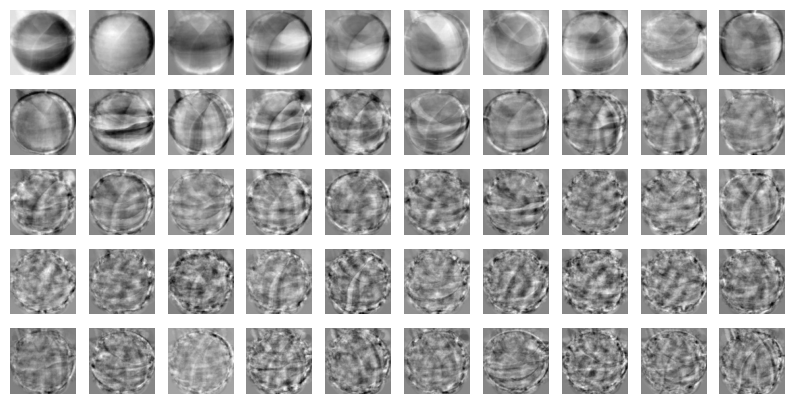

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)

In [ ]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

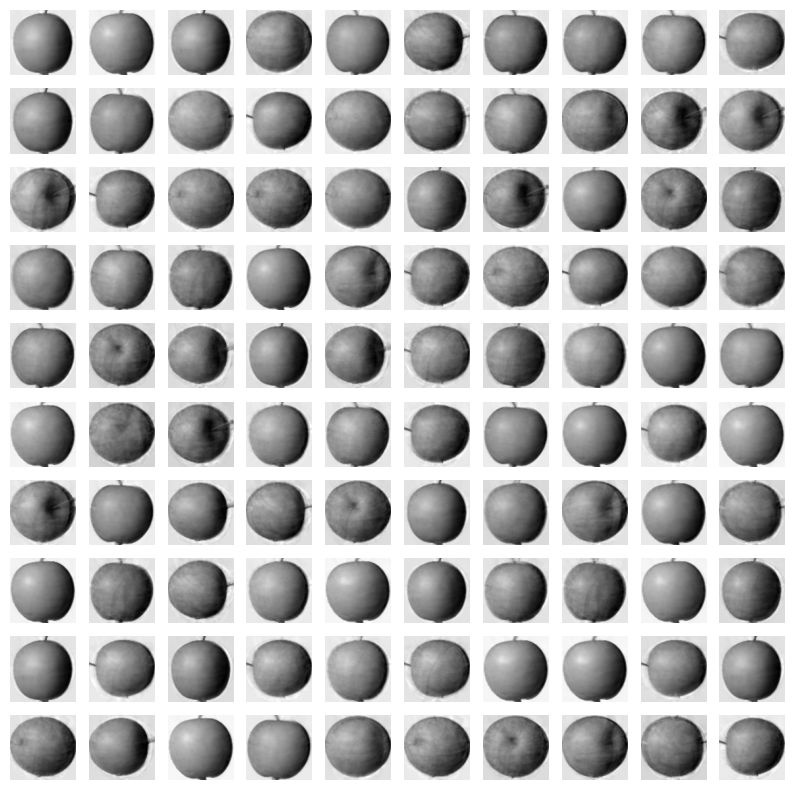

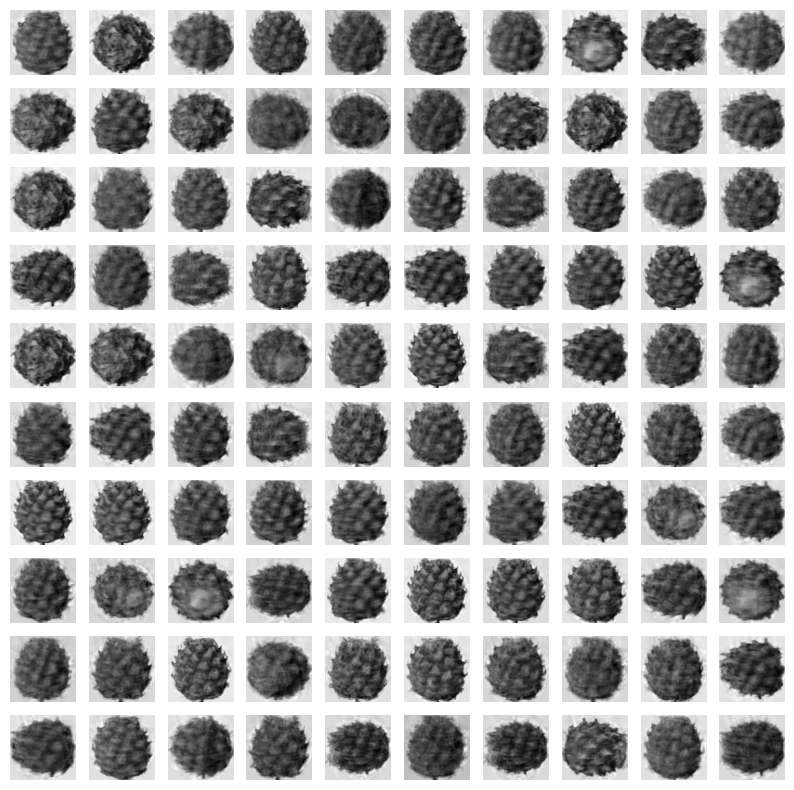

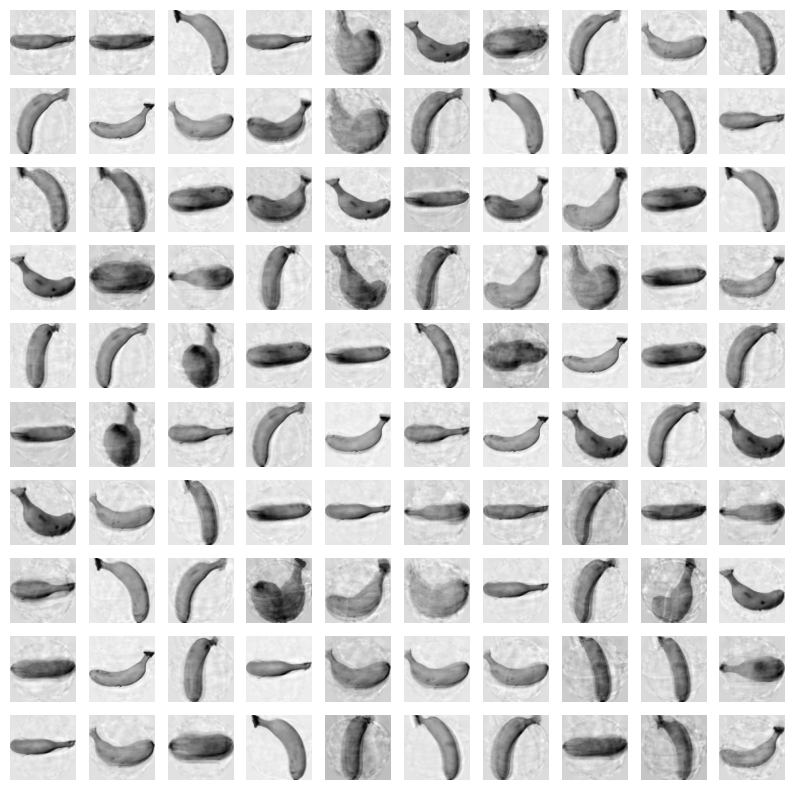

In [ ]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [ ]:
len(pca.explained_variance_ratio_)

50

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215253442651624


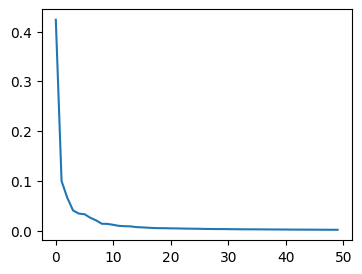

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(pca.explained_variance_ratio_) # 주성분이 늘어날수록 줄어드는 모습. 첫번째 주성분이 데이터 특성 가장 많이 포함하는 모습

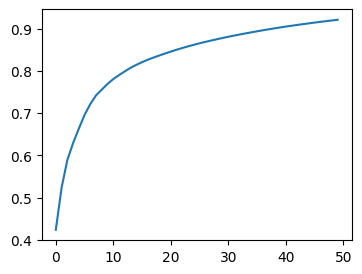

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # 누적합

확인문제 : 3개, 5개, 10개, 15, 20개로 주성분 분석 진행 후 각각 압축된 이미지 결과 비교
- 주성분 개수가 얼마일 때부터 이미지를 식별 가능한지 확인해보세요

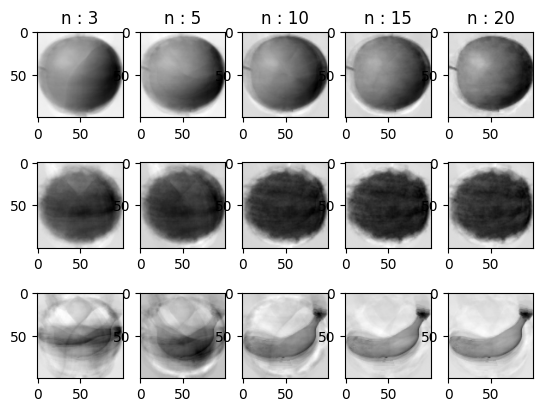

In [ ]:
# 주성분 개수에 따라 압축 복원 시 결과 비교
components = [3, 5, 10, 15, 20]
fruits_reconstruct_list = []

# 원복 시킨 데이터 리스트에 저장
for n in components :
    pca = PCA(n_components=n)
    pca.fit(fruits_2d)
    fruits_pca = pca.transform(fruits_2d)   # 차원 축소
    fruits_inverse = pca.inverse_transform(fruits_pca) # 복원 하기
    fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
    fruits_reconstruct_list.append(fruits_reconstruct) # 리스트에 추가

fig, axs = plt.subplots(3, len(fruits_reconstruct_list))

# 사과, 파인애플, 바나나 각 마지막 이미지만 출력하여 원복 결과 비교
for idx, start in enumerate([0, 100, 200]):
  for i in range(len(fruits_reconstruct_list)) :
    axs[idx,i].imshow(fruits_reconstruct_list[i][start+99:start+100].squeeze(), cmap='gray_r') # 각각의 이미지 99, 199, 299번쨰 이미지 뽑아 사용하기 위한 코드
    axs[0,i].set_title(f"n : {components[i]}") if idx == 0 else None # 3, 5, 10 ,15, 20 주성분의 압축 원복 결과물 얻기
plt.show()

## 다른 알고리즘과 함께 사용하기

### 로지스틱 회귀를 통한 분류 - 지도학습

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.2602019309997559


In [ ]:
scores = cross_validate(lr, fruits_pca, target) # 차원 축소한 fruits_pca 사용
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 데이터 스코어는 동일하지만 시간이 대폭 감소한것을 볼 수 있음

0.9966666666666667
0.026962137222290038


In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_) # 차원이 2개로 감소

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 차원의 개수가 작아질수록 빠른 학습속도 얻는것이 가능

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.99
0.08156776428222656


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K-means를 통한 클러스터링 - 비지도학습

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


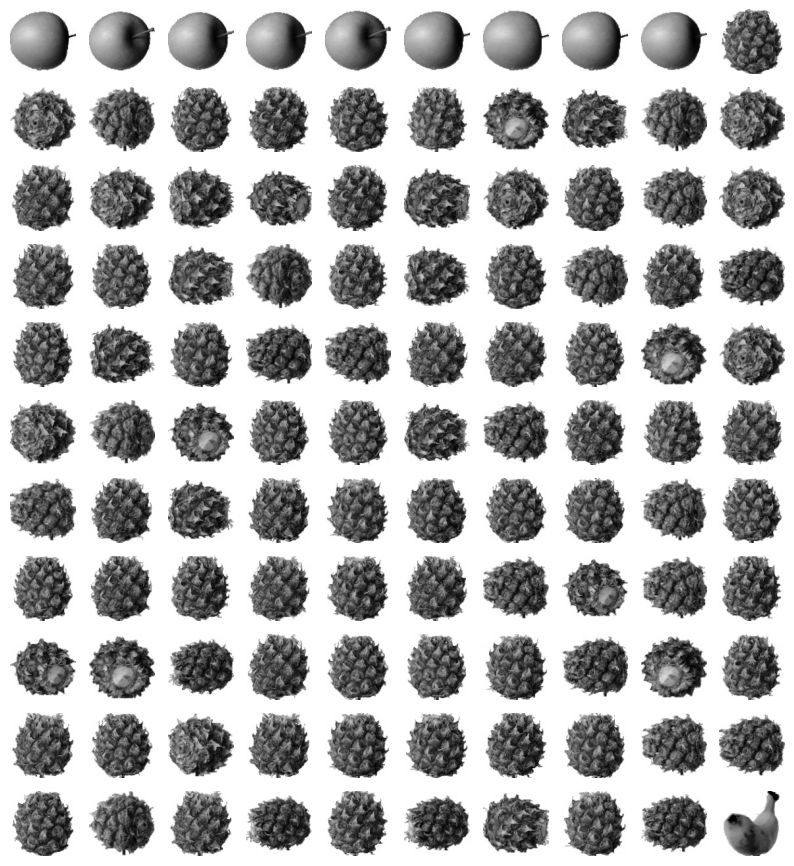

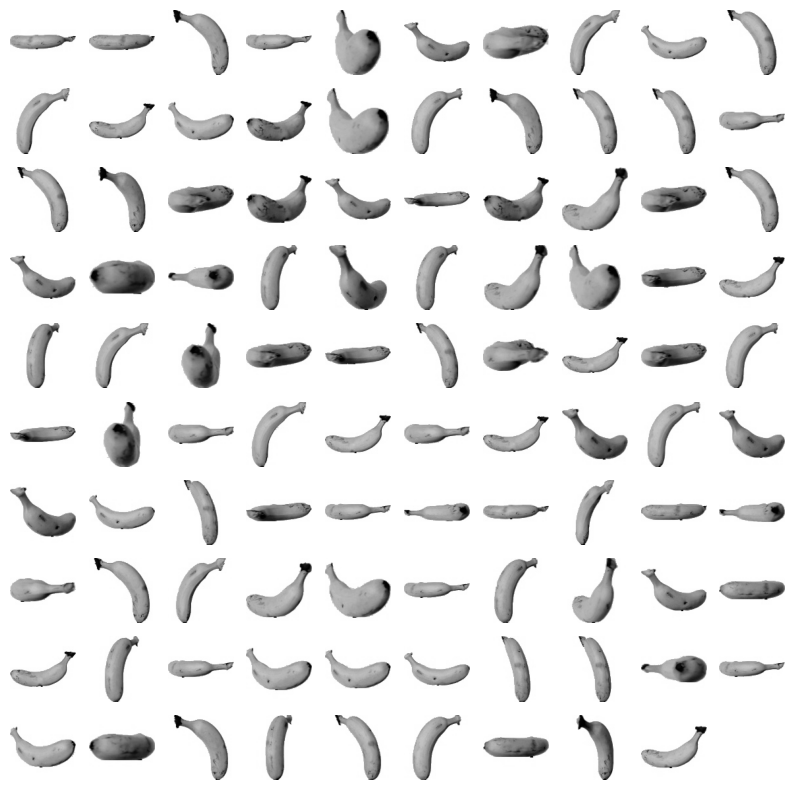

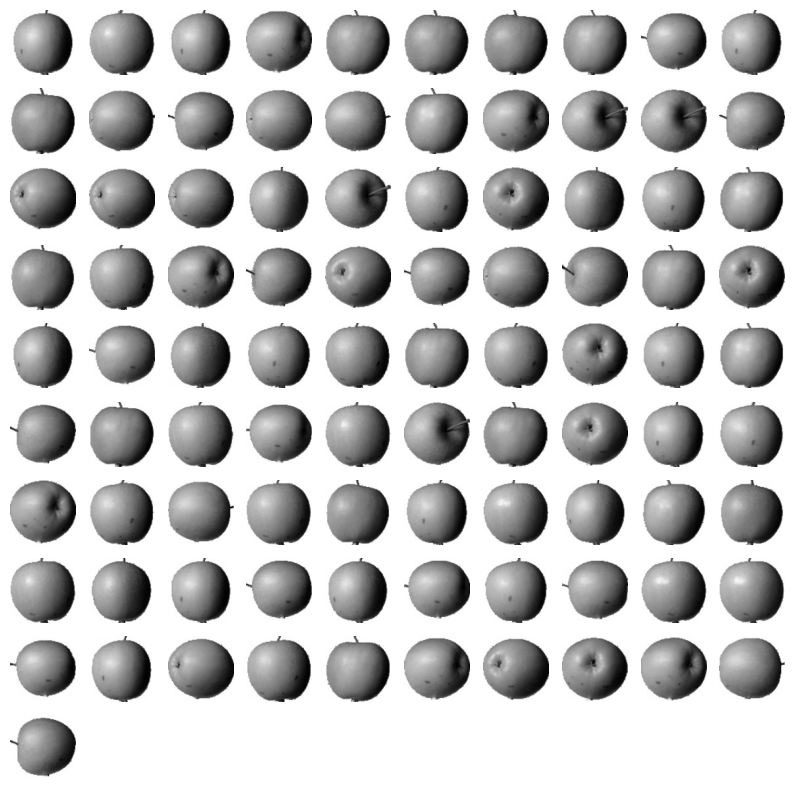

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n") # 차원 축소한 데이터 시각화. 축소 해도 원본 특성이 저장되어있어 분류작업이 잘 진행된다

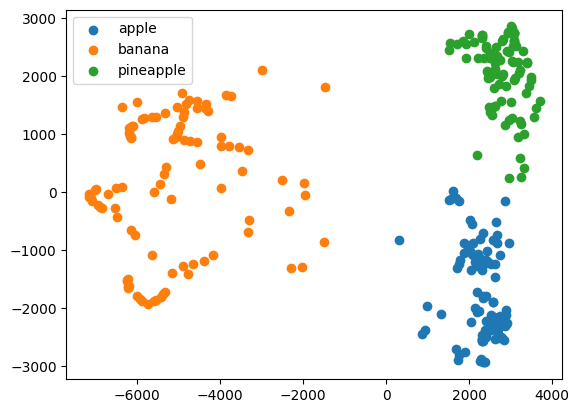

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()